In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
adult_pdf = pd.read_csv('adult.csv')

adult_pdf


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
def plot_three_d_hist(df, col1, col2, normalized = 1, num_bins = 100):
    """
    plots histogram based on col1 which is the key and col2 which is the value to plot
    """
    
    values = df[col1].unique()
    
    if len(values) > 10:
        print('try doing this with less distinct values')
    
    else:
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection = '3d')
        
        bins_1 = np.linspace(df[col2].min(), df[col2].max(), num_bins)
        
        for i in range(len(values)):
            item = values[i]
            x = df[df[col1] == item][col2]
            hist, bins = np.histogram(x, bins = bins_1, normed = normalized)
            xs = (bins[:-1] + bins[1:])/2
            
            ax.bar(xs, hist, zs = i, zdir = 'y', alpha = 0.8, label = item)
            
        ax.legend(bbox_to_anchor=(0, 0), loc='upper left', ncol=1)
        
        plt.show()
            

<ipython-input-3-ec85d12acad8>:21: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(x, bins = bins_1, normed = normalized)


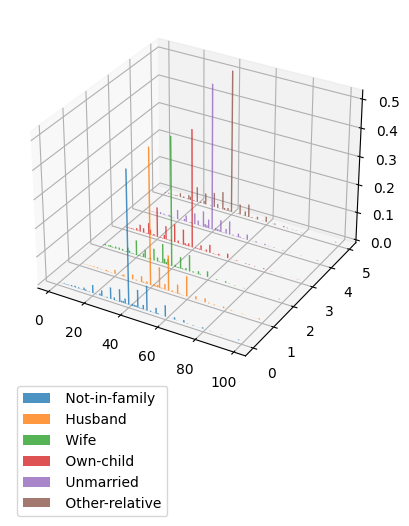

In [4]:
plot_three_d_hist(adult_pdf, 'relationship', 'hours_per_week', normalized = 1)